In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier ,plot_tree 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_validate 

import os
for dirname, _, filenames in os.walk('/FP'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train_file_path = './6_class_csv.csv'
train_data = pd.read_csv(train_file_path)
train_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
train_data.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

# Preprocessing Data

In [4]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Fix Star color overlapping
    color_mapping = {
        'Blue ': 'Blue',
        'Blue white': 'Blue White',
        'Blue-white': 'Blue White',
        'Blue white ': 'Blue White',
        'Blue-White': 'Blue White',
        'white': 'White',
        'yellow-white': 'Yellowish White',
        'White-Yellow': 'Yellowish White',
        'yellowish': 'Yellowish'
    }
    df['Star color'] = df['Star color'].replace(color_mapping)
    
    # One-hot encoding
    df = pd.concat([df, pd.get_dummies(df['Star color'], prefix='Color')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Spectral Class'], prefix='Class')], axis=1)
    df = df.drop(['Star color', 'Spectral Class'], axis=1)
    
    # Split X and y
    X = df.drop('Star type', axis=1)
    y = df['Star type']
    
    # Train-test split (7:3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=0)

    # Scale X
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = preprocess_inputs(train_data)
X_train

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Color_Blue,Color_Blue White,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,...,Color_Whitish,Color_Yellowish,Color_Yellowish White,Class_A,Class_B,Class_F,Class_G,Class_K,Class_M,Class_O
61,-0.710590,-0.607428,-0.458255,1.153147,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
210,1.368814,-0.532507,-0.446344,-0.799426,-0.549841,2.391652,-0.109764,0.0,-0.077382,-0.964901,...,-0.077382,-0.109764,-0.223607,-0.324443,2.189316,-0.27735,0.0,-0.134840,-0.976467,-0.4279
52,-0.666403,1.029405,1.824986,-1.323333,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
66,-0.764119,-0.607428,-0.458442,1.285781,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
26,-0.145838,-0.607428,-0.458603,0.893562,-0.549841,2.391652,-0.109764,0.0,-0.077382,-0.964901,...,-0.077382,-0.109764,-0.223607,3.082207,-0.456764,-0.27735,0.0,-0.134840,-0.976467,-0.4279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.778189,-0.607428,-0.458445,1.106725,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
192,-0.758733,-0.607428,-0.458081,0.822507,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
117,-0.689376,-0.162113,1.232368,-1.422809,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
47,-0.694982,0.596125,-0.286820,-0.948166,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279


# IMPORT LIBRARY

In [6]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report




# SVM (kernel = RBF)

In [7]:
C = [0.1 ,0.5,1,10,50,100]
rbf_acc = []
rbf_pre = []
print("RBF Kernel Accuracy:")
for num in C:
  svc=SVC(kernel='rbf',C=num) 

  # fit classifier to training set
  svc.fit(X_train,y_train)

  # make predictions on test set
  y_pred=svc.predict(X_test)

  # compute and print accuracy score
  print("C = " + str(num))
  print("Akurasi: "+ format(accuracy_score(y_test, y_pred)) )
  print("Presisi: "+ format(precision_score(y_test, y_pred,  average='micro')) )
  print("\n")
  rbf_acc.append(accuracy_score(y_test, y_pred)*100)
  rbf_pre.append(precision_score(y_test, y_pred,  average='micro')*100)


RBF Kernel Accuracy:
C = 0.1
Akurasi: 0.4861111111111111
Presisi: 0.4861111111111111


C = 0.5
Akurasi: 0.75
Presisi: 0.75


C = 1
Akurasi: 0.8194444444444444
Presisi: 0.8194444444444444


C = 10
Akurasi: 0.9444444444444444
Presisi: 0.9444444444444444


C = 50
Akurasi: 0.9722222222222222
Presisi: 0.9722222222222222


C = 100
Akurasi: 0.9722222222222222
Presisi: 0.9722222222222222




## Grafik pengujian kernel RBF

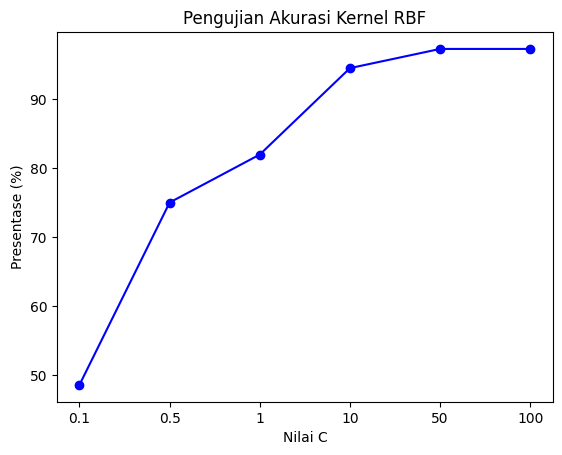

In [8]:
import matplotlib.pyplot as plt

x_axis = ['0.1', '0.5', '1', '10', '50', '100']
y_axis = rbf_acc

plt.plot(x_axis, y_axis,'-bo',label='Akurasi')
plt.title('Pengujian Akurasi Kernel RBF')
plt.xlabel('Nilai C')
plt.ylabel('Presentase (%)')
plt.show()

# SVM (kernel = linear)



In [9]:
C = [0.1 ,0.5,1,10,50,100]
linear_acc = []
linear_pre = []
print("Linear Kernel Accuracy:")
for num in C:
  svc=SVC(kernel='linear',C=num) 

  # fit classifier to training set
  svc.fit(X_train,y_train)

  # make predictions on test set
  y_pred=svc.predict(X_test)

  # compute and print accuracy score
  print("C = " + str(num))
  print("Akurasi: "+ format(accuracy_score(y_test, y_pred)) )
  print("Presisi: "+ format(precision_score(y_test, y_pred,  average='micro')) )
  print("\n")
  linear_acc.append(accuracy_score(y_test, y_pred)*100)
  linear_pre.append(precision_score(y_test, y_pred,  average='micro')*100)


Linear Kernel Accuracy:
C = 0.1
Akurasi: 0.8194444444444444
Presisi: 0.8194444444444444


C = 0.5
Akurasi: 0.9166666666666666
Presisi: 0.9166666666666666


C = 1
Akurasi: 0.9583333333333334
Presisi: 0.9583333333333334


C = 10
Akurasi: 0.9583333333333334
Presisi: 0.9583333333333334


C = 50
Akurasi: 0.9583333333333334
Presisi: 0.9583333333333334


C = 100
Akurasi: 0.9583333333333334
Presisi: 0.9583333333333334




## Grafik Pengujian Kernel Linear

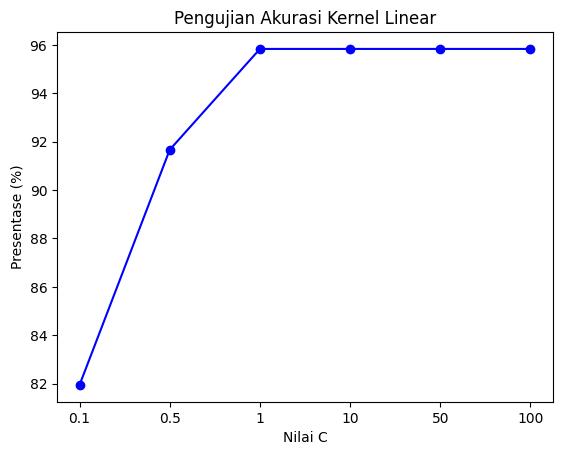

In [10]:
import matplotlib.pyplot as plt

x_axis = ['0.1', '0.5', '1', '10', '50', '100']
y_axis = linear_acc

plt.plot(x_axis, y_axis,'-bo',label='Akurasi')
plt.title('Pengujian Akurasi Kernel Linear')
plt.xlabel('Nilai C')
plt.ylabel('Presentase (%)')
plt.show()

# SVM (kernel = polynomial)

In [11]:
C = [0.1 ,0.5,1,10,50,100]
poly_acc = []
poly_pre = []
print("Polynomial Kernel Accuracy:")
for num in C:
  svc=SVC(kernel='poly',C=num) 

  # fit classifier to training set
  svc.fit(X_train,y_train)

  # make predictions on test set
  y_pred=svc.predict(X_test)

  # compute and print accuracy score
  print("C = " + str(num))
  print("Akurasi: "+ format(accuracy_score(y_test, y_pred)) )
  print("Presisi: "+ format(precision_score(y_test, y_pred,  average='micro')) )
  print("\n")
  poly_acc.append(accuracy_score(y_test, y_pred)*100)
  poly_pre.append(precision_score(y_test, y_pred,  average='micro')*100)


Polynomial Kernel Accuracy:
C = 0.1
Akurasi: 0.2777777777777778
Presisi: 0.2777777777777778


C = 0.5
Akurasi: 0.7083333333333334
Presisi: 0.7083333333333334


C = 1
Akurasi: 0.7361111111111112
Presisi: 0.7361111111111112


C = 10
Akurasi: 0.9583333333333334
Presisi: 0.9583333333333334


C = 50
Akurasi: 0.9305555555555556
Presisi: 0.9305555555555556


C = 100
Akurasi: 0.9583333333333334
Presisi: 0.9583333333333334




## Grafik Pengujian Kernel Polynomial

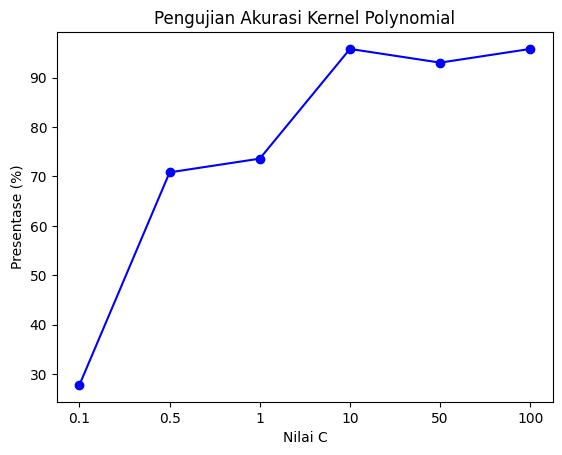

In [12]:
import matplotlib.pyplot as plt

x_axis = ['0.1', '0.5', '1', '10', '50', '100']
y_axis = poly_acc

plt.plot(x_axis, y_axis,'-bo',label='Akurasi')
plt.title('Pengujian Akurasi Kernel Polynomial')
plt.xlabel('Nilai C')
plt.ylabel('Presentase (%)')
plt.show()

# SVM (kernel = sigmoid)

In [13]:
C = [0.1 ,0.5,1,10,50,100]
sig_acc = []
sig_pre = []
print("Sigmoid Kernel Accuracy:")
for num in C:
  svc=SVC(kernel='sigmoid',C=num) 

  # fit classifier to training set
  svc.fit(X_train,y_train)

  # make predictions on test set
  y_pred=svc.predict(X_test)

  # compute and print accuracy score
  print("C = " + str(num))
  print("Akurasi: "+ format(accuracy_score(y_test, y_pred)) )
  print("Presisi: "+ format(precision_score(y_test, y_pred,  average='micro')) )
  print("\n")
  sig_acc.append(accuracy_score(y_test, y_pred)*100)
  sig_pre.append(precision_score(y_test, y_pred,  average='micro')*100)


Sigmoid Kernel Accuracy:
C = 0.1
Akurasi: 0.5277777777777778
Presisi: 0.5277777777777778


C = 0.5
Akurasi: 0.75
Presisi: 0.75


C = 1
Akurasi: 0.7777777777777778
Presisi: 0.7777777777777778


C = 10
Akurasi: 0.9166666666666666
Presisi: 0.9166666666666666


C = 50
Akurasi: 0.9305555555555556
Presisi: 0.9305555555555556


C = 100
Akurasi: 0.9583333333333334
Presisi: 0.9583333333333334




## Grafik Pengujian Kernel Sigmoid

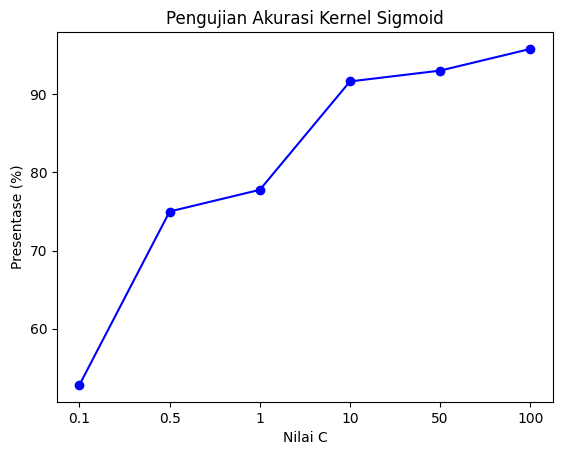

In [14]:
import matplotlib.pyplot as plt

x_axis = ['0.1', '0.5', '1', '10', '50', '100']
y_axis = sig_acc

plt.plot(x_axis, y_axis,'-bo',label='Akurasi')
plt.title('Pengujian Akurasi Kernel Sigmoid')
plt.xlabel('Nilai C')
plt.ylabel('Presentase (%)')
plt.show()

In [15]:
print(rbf_acc)
print(linear_acc)
print(poly_acc)
print(sig_acc)

[48.61111111111111, 75.0, 81.94444444444444, 94.44444444444444, 97.22222222222221, 97.22222222222221]
[81.94444444444444, 91.66666666666666, 95.83333333333334, 95.83333333333334, 95.83333333333334, 95.83333333333334]
[27.77777777777778, 70.83333333333334, 73.61111111111111, 95.83333333333334, 93.05555555555556, 95.83333333333334]
[52.77777777777778, 75.0, 77.77777777777779, 91.66666666666666, 93.05555555555556, 95.83333333333334]


# Kesimpulan
Dari hasil SVM menggunaan kernel rbf, didapatkan akurasi tertinggi yaitu 97.22% ketika nilai C=50 dan C=100. Sedangkan akurasi terendah yaitu 48.61% ketika C = 0.1

Dari hasil kernel linear, didapatkan akurasi tertinggi yaitu 95.83% ketika C = 1, 10, 50, dan 100. Sedangkan akurasi terendah yaitu 81.94% ketika C = 0.1

Dari hasil kernel polynomial, didapatkan akurasi tertinggi yaitu 95.83% ketika C = 10 dan C = 100. Sedangkan akurasi terendah yaitu 27.78% ketika C = 0.1

Dari hasil kernel sigmoid, didapatkan akurasi tertinggi yaitu 95.83% ketika C = 100. Sedangkan akurasi terendah yaitu 52.78% ketika C = 0.1

Dari keempat jenis kernel yang diuji dan lima nilai C, didapatkan bahwa akurasi tertinggi **yaitu 97.22% dengan menggunakan kernel jenis RBF dengan nilai C = 50 dan C = 100**. 